In [1]:
#NOTE: Before running the notebook ensure that folder bbc, this notebook, and classify_text are in the same directory
#doc2vec_PV-DM
#Summary: PV-DM: Learns a model topredict the centre word of a randmly sampled context words and a paragraph vector. 
#Tries to learn the correct probability distribution for central words given the context words and the paragraph vector.
#uses LSTM with RNN architecture to learn doc embeddings
import gensim.models as gsm
import logging as lg

training_text = "data_for_embeddings.txt"
#Model location
d2v_dm_loc ="d2v_dm.model"
#logging
lg.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=lg.INFO)
#training PV-DM model #dm=1
text =gsm.doc2vec.TaggedLineDocument(training_text)
doc2vec_dm_model =gsm.Doc2Vec(text, vector_size=200, window=30, min_count=1, sample=1e-6, workers=1, hs=0, dm=1, negative=10, dbow_words=1, dm_concat=1,ns_exponent=.75, epochs=100)
#saving the model at the specified location
doc2vec_dm_model.save(d2v_dm_loc)

2020-05-26 17:08:59,402 : INFO : using concatenative 12200-dimensional layer1
2020-05-26 17:08:59,422 : INFO : collecting all words and their counts
C:\Users\A\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 17:08:59,451 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-05-26 17:08:59,486 : INFO : collected 2474 word types and 199 unique tags from a corpus of 199 examples and 6404 words
2020-05-26 17:08:59,486 : INFO : Loading a fresh vocabulary
2020-05-26 17:08:59,511 : INFO : effective_min_count=1 retains 2474 unique words (100% of original 2474, drops 0)
2020-05-26 17:08:59,511 : INFO : effective_min_count=1 leaves 6404 word corpus (100% of origina

2020-05-26 17:09:03,017 : INFO : EPOCH - 31 : training on 6404 raw words (484 effective words) took 0.1s, 4608 effective words/s
2020-05-26 17:09:03,119 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:03,121 : INFO : EPOCH - 32 : training on 6404 raw words (501 effective words) took 0.1s, 5253 effective words/s
2020-05-26 17:09:03,206 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:03,212 : INFO : EPOCH - 33 : training on 6404 raw words (489 effective words) took 0.1s, 5619 effective words/s
2020-05-26 17:09:03,308 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:03,311 : INFO : EPOCH - 34 : training on 6404 raw words (488 effective words) took 0.1s, 5260 effective words/s
2020-05-26 17:09:03,426 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:03,429 : INFO : EPOCH - 35 : training on 6404 raw words (503 effective words) took 0.1s, 4462 effective

2020-05-26 17:09:06,166 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:06,168 : INFO : EPOCH - 69 : training on 6404 raw words (479 effective words) took 0.1s, 7266 effective words/s
2020-05-26 17:09:06,250 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:06,260 : INFO : EPOCH - 70 : training on 6404 raw words (510 effective words) took 0.1s, 6068 effective words/s
2020-05-26 17:09:06,352 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:06,358 : INFO : EPOCH - 71 : training on 6404 raw words (474 effective words) took 0.1s, 5159 effective words/s
2020-05-26 17:09:06,446 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:06,451 : INFO : EPOCH - 72 : training on 6404 raw words (466 effective words) took 0.1s, 5260 effective words/s
2020-05-26 17:09:06,534 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-26 17:09:06,540 : INF

In [2]:
#For task2: Trained a 3 layer deep NN to obtain a softmax output for 5 different classes. Train Accuraccy obtained about 90%.
#Classify_text output business
#embeddings used: doc2vec_PV-DM
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops


%matplotlib inline

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
#import nltk
#nltk.download('punkt')
import os
import gensim as gsm
from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("d2v_dm.model")
X_train =[];
for dirs in os.listdir("./bbc"):
    for file in os.listdir("./bbc/"+dirs):
        fh=open("./bbc/"+dirs+'/'+file)
        inp=fh.read()
        X_train.append(model.infer_vector(word_tokenize(inp)))

2020-05-26 17:09:58,623 : INFO : loading Doc2Vec object from task1_d2v_dm.model
C:\Users\A\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 17:09:58,675 : INFO : loading vocabulary recursively from task1_d2v_dm.model.vocabulary.* with mmap=None
2020-05-26 17:09:58,677 : INFO : loading trainables recursively from task1_d2v_dm.model.trainables.* with mmap=None
2020-05-26 17:09:58,677 : INFO : loading syn1neg from task1_d2v_dm.model.trainables.syn1neg.npy with mmap=None
2020-05-26 17:10:00,175 : INFO : loading wv recursively from task1_d2v_dm.model.wv.* with mmap=None
2020-05-26 17:10:00,179 : INFO : loading docvecs recursively from task1_d2v_dm.model.docvecs.* with mmap=None
2020-05-26 17

In [4]:
print(np.shape(X_train))

(2225, 200)


In [5]:
c=0;
Y_train=[]
for dirs in os.listdir("./bbc"):
    a=np.zeros(5)
    a[c]=1
    for file in os.listdir("./bbc/"+dirs):
        Y_train.append(a)
    c+=1;
print(np.shape(Y_train))

(2225, 5)


In [6]:

X_train=np.transpose(X_train)
print(np.shape(X_train))
Y_train=np.transpose(Y_train)
print(np.shape(Y_train))

(200, 2225)
(5, 2225)


In [7]:
def create_placeholders(n_x, n_y):
    
    #Creates the placeholders for the tensorflow session.
    X = tf.placeholder(tf.float32,[n_x,None])
    Y = tf.placeholder(tf.float32,[n_y,None])
    
    return X, Y

In [8]:
def initialize_parameters():
    
    #first hidden layer 25 hidden units
    W1 = tf.get_variable("W1",[25,200],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    #second hidden layer 12 hidden units
    W2 = tf.get_variable("W2",[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer())
    #output layer 5 units
    W3 = tf.get_variable("W3",[5,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[5,1],initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    
    #Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    #Activations         
    Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    A1 = tf.nn.relu(Z1)                                             
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                             
    A2 = tf.nn.relu(Z2)                                             
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                              

    
    return Z3

In [10]:
def compute_cost(Z3, Y):
    
    #cost function
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    
    #Creates a list of random minibatches from (X, Y)
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    #np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [12]:
def model(X_train, Y_train, learning_rate = 0.001,
          num_epochs = 1500, minibatch_size = 64, print_cost = True):
    
    #Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    #print_cost: True to print the cost every 100 epochs
    #output: parameters: parameters learnt by the model. Used for prediction
    
    # to be able to rerun the model without overwriting tf variables
    ops.reset_default_graph()                         
                                             
    (n_x, m) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    
    #tracking cost after every 100 epochs
    costs = []                                        
    
    #Using all the above functions defined using tensorflow
    X, Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Optimiser: Adam
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost],feed_dict={X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every 100 epochs
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        
        return parameters

2020-05-26 17:18:01,631 : WARNING : 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

2020-05-26 17:18:02,100 : WARNING : From <ipython-input-10-49a7c2bda3d3>:8: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 0.878801
Cost after epoch 100: 0.767180
Cost after epoch 200: 0.726402
Cost after epoch 300: 0.709835
Cost after epoch 400: 0.684906
Cost after epoch 500: 0.653975
Cost after epoch 600: 0.629090
Cost after epoch 700: 0.601082
Cost after epoch 800: 0.572356
Cost after epoch 900: 0.536861
Cost after epoch 1000: 0.501920
Cost after epoch 1100: 0.470170
Cost after epoch 1200: 0.436755
Cost after epoch 1300: 0.400942
Cost after epoch 1400: 0.370321


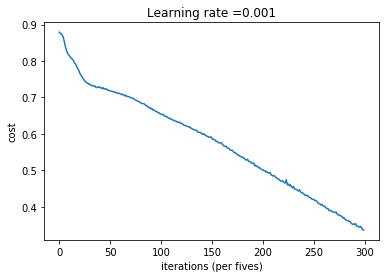

Parameters have been trained!
Train Accuracy: 0.7905618


In [13]:
parameters = model(X_train, Y_train)